In [142]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [143]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
# %matplotlib inline

In [144]:
combine= pd.read_csv("train.csv")
combine.shape
combine.head

<bound method NDFrame.head of            id  label  \
0           1      0   
1           2      0   
2           3      1   
3           4      0   
4           5      0   
...       ...    ...   
99984   99996      0   
99985   99997      1   
99986   99998      0   
99987   99999      1   
99988  100000      1   

                                                                                                                                            tweet  
0                                                                                                        is so sad for my APL friend.............  
1                                                                                                                I missed the New Moon trailer...  
2                                                                                                                         omg its already 7:30 :O  
3                      .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 

In [145]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text
                            

## Removing twitter handles 


In [146]:
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*") 
combine.head()

,id,label,tweet,tidy_tweet
0,1,0,is so sad for my APL friend.............,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,5,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me!!! T_T


In [147]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0,is so sad for my APL friend.............,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,5,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me!!! T_T
5,6,0,or i just worry too much?,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| TV Tonight,Sunny Again Work Tomorrow :-| TV Tonight
8,9,1,handed in my uniform today . i miss you already,handed in my uniform today . i miss you already
9,10,1,hmmmm.... i wonder how she my number @-),hmmmm.... i wonder how she my number -)


## Removing short words (a,is,so etc..)

In [148]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing words whose length is less than 3

In [149]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0,is so sad for my APL friend.............,friend.............
1,2,0,I missed the New Moon trailer...,missed Moon trailer...
2,3,1,omg its already 7:30 :O,already 7:30
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga. sooo gunna CRy. I've been this dentist since 11.. suposed just crown (30mins)...
4,5,0,i think mi bf is cheating on me!!! T_T,think cheating me!!!


In [150]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0                                                                                      [friend.............]
1                                                                                 [missed, Moon, trailer...]
2                                                                                            [already, 7:30]
3    [Omgaga., sooo, gunna, CRy., I've, been, this, dentist, since, 11.., suposed, just, crown, (30mins)...]
4                                                                                   [think, cheating, me!!!]
Name: tidy_tweet, dtype: object

In [151]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in tweet

In [152]:
#now let's combine these tokens back

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
combine['tidy_tweet'] = tokenized_tweet

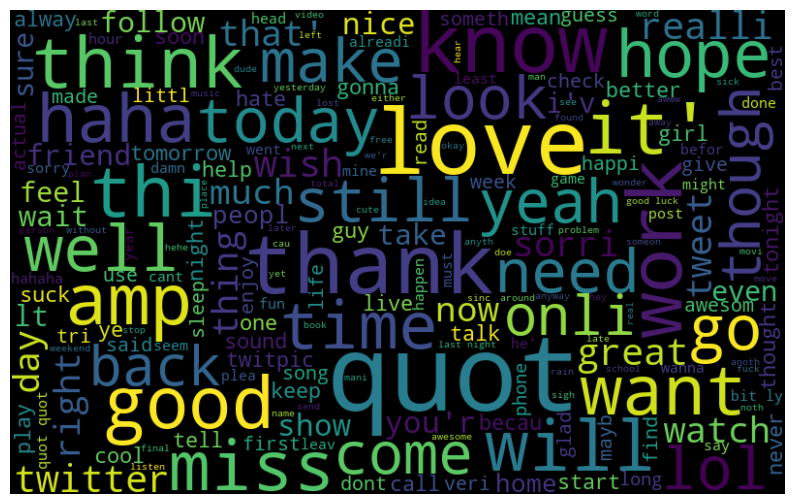

In [153]:
all_words = ' '.join([text for text in combine['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [154]:
#you can see that most words are positive or neutral in above wordcloud.
#now we will plot separate wordclouds for both racist and non-racis/sexist in our data.

## Separate cloud

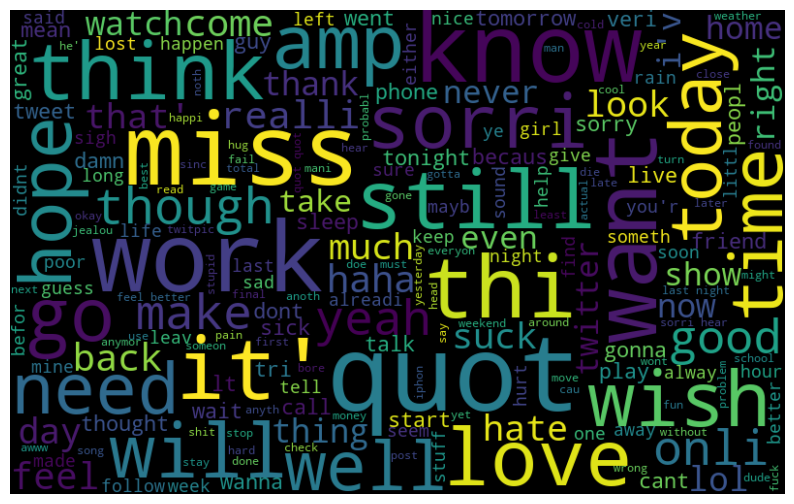

In [155]:
normal_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

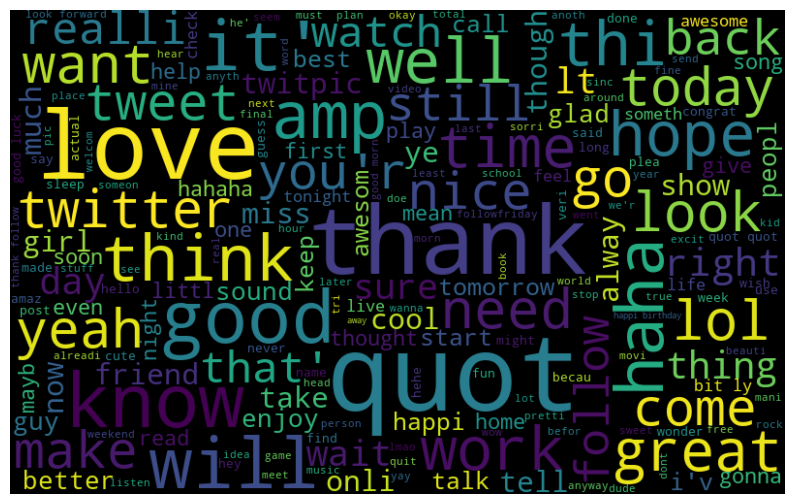

In [156]:
#racist tweet

negative_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## understanding impact of hashtags on tweet sentiment

In [157]:
#collect hashtags

def hashtag_extract(x):
    hashtags=[]
    for i in x: #loop over words contain in tweet
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [158]:


#extracting hashtags from non racist tweets
ht_regular = hashtag_extract(combine['tidy_tweet'][combine['label']==0])
#extracting hashtags from racist tweets
ht_negative=hashtag_extract(combine['tidy_tweet'][combine['label']==1])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])


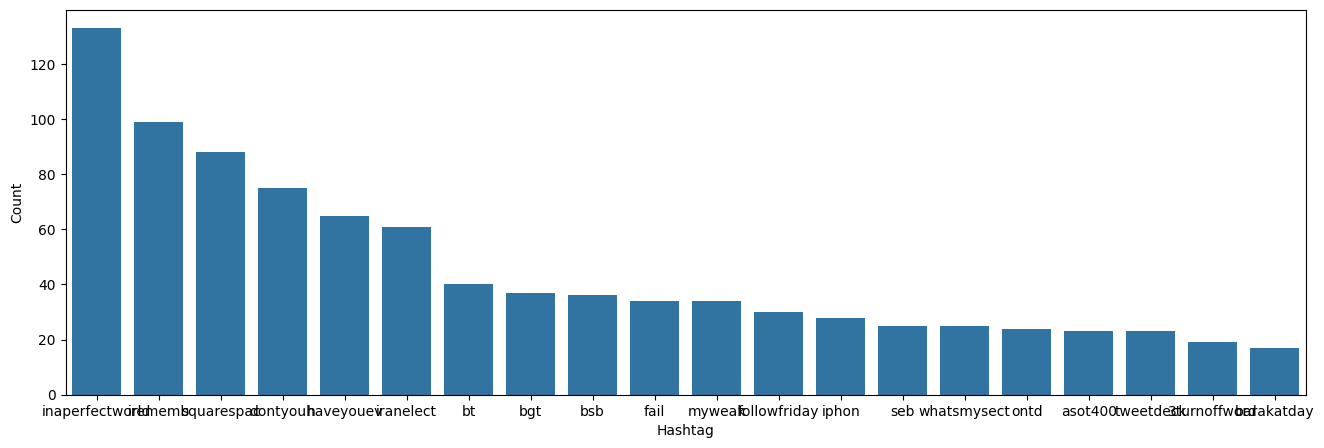

In [159]:
#non-racist tweets

nonracist_tweets = nltk.FreqDist(ht_regular)
df1 = pd.DataFrame({'Hashtag': list(nonracist_tweets.keys()),'Count':list(nonracist_tweets.values())})

#selecting top 20 most frequent hashtags
df1 = df1.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

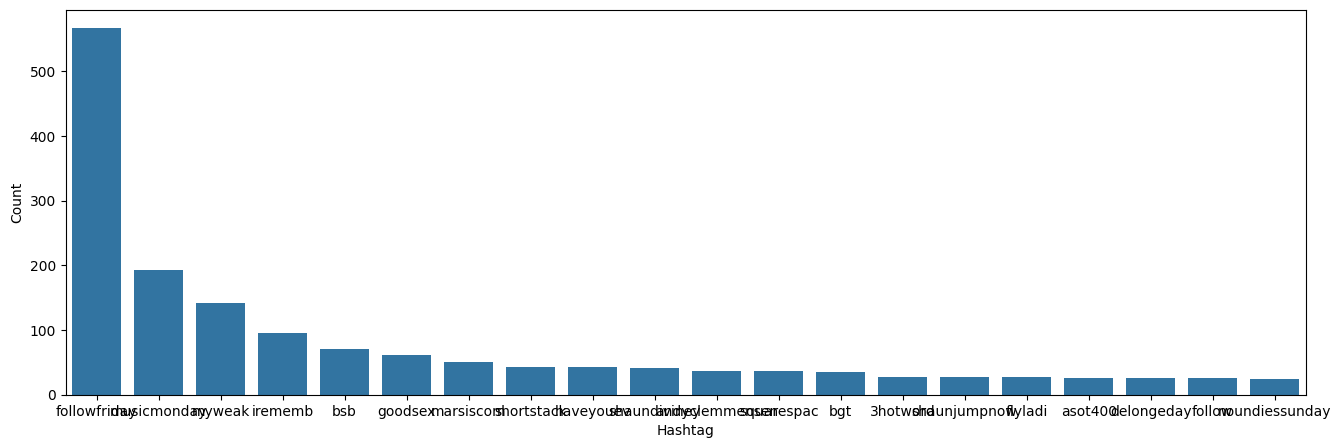

In [160]:
#racist tweets

racist_tweets = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'Hashtag': list(racist_tweets.keys()),'Count': list(racist_tweets.values())}) #count number of occurrence of particular word

#selecting top 20 frequent  hashtags

df2 = df2.nlargest(columns = "Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df2, x="Hashtag",y="Count")
plt.show()

## Now we will apply assorted techniques like bag of words,TF-IDF for converting data into features

In [161]:
from sklearn.feature_extraction.text import CountVectorizer 
import gensim 

In [162]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.9 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet']) # tokenize and build vocabulary
bow.shape

(99989, 1000)

In [163]:
combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['label'],
                                                    test_size=0.2, random_state=42)

In [164]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (79991, 1000)
X_test_shape :  (19998, 1000)
y_train_shape :  (79991,)
y_test_shape :  (19998,)


## we will use Multinomial Naive Bayes Classifier

In [165]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

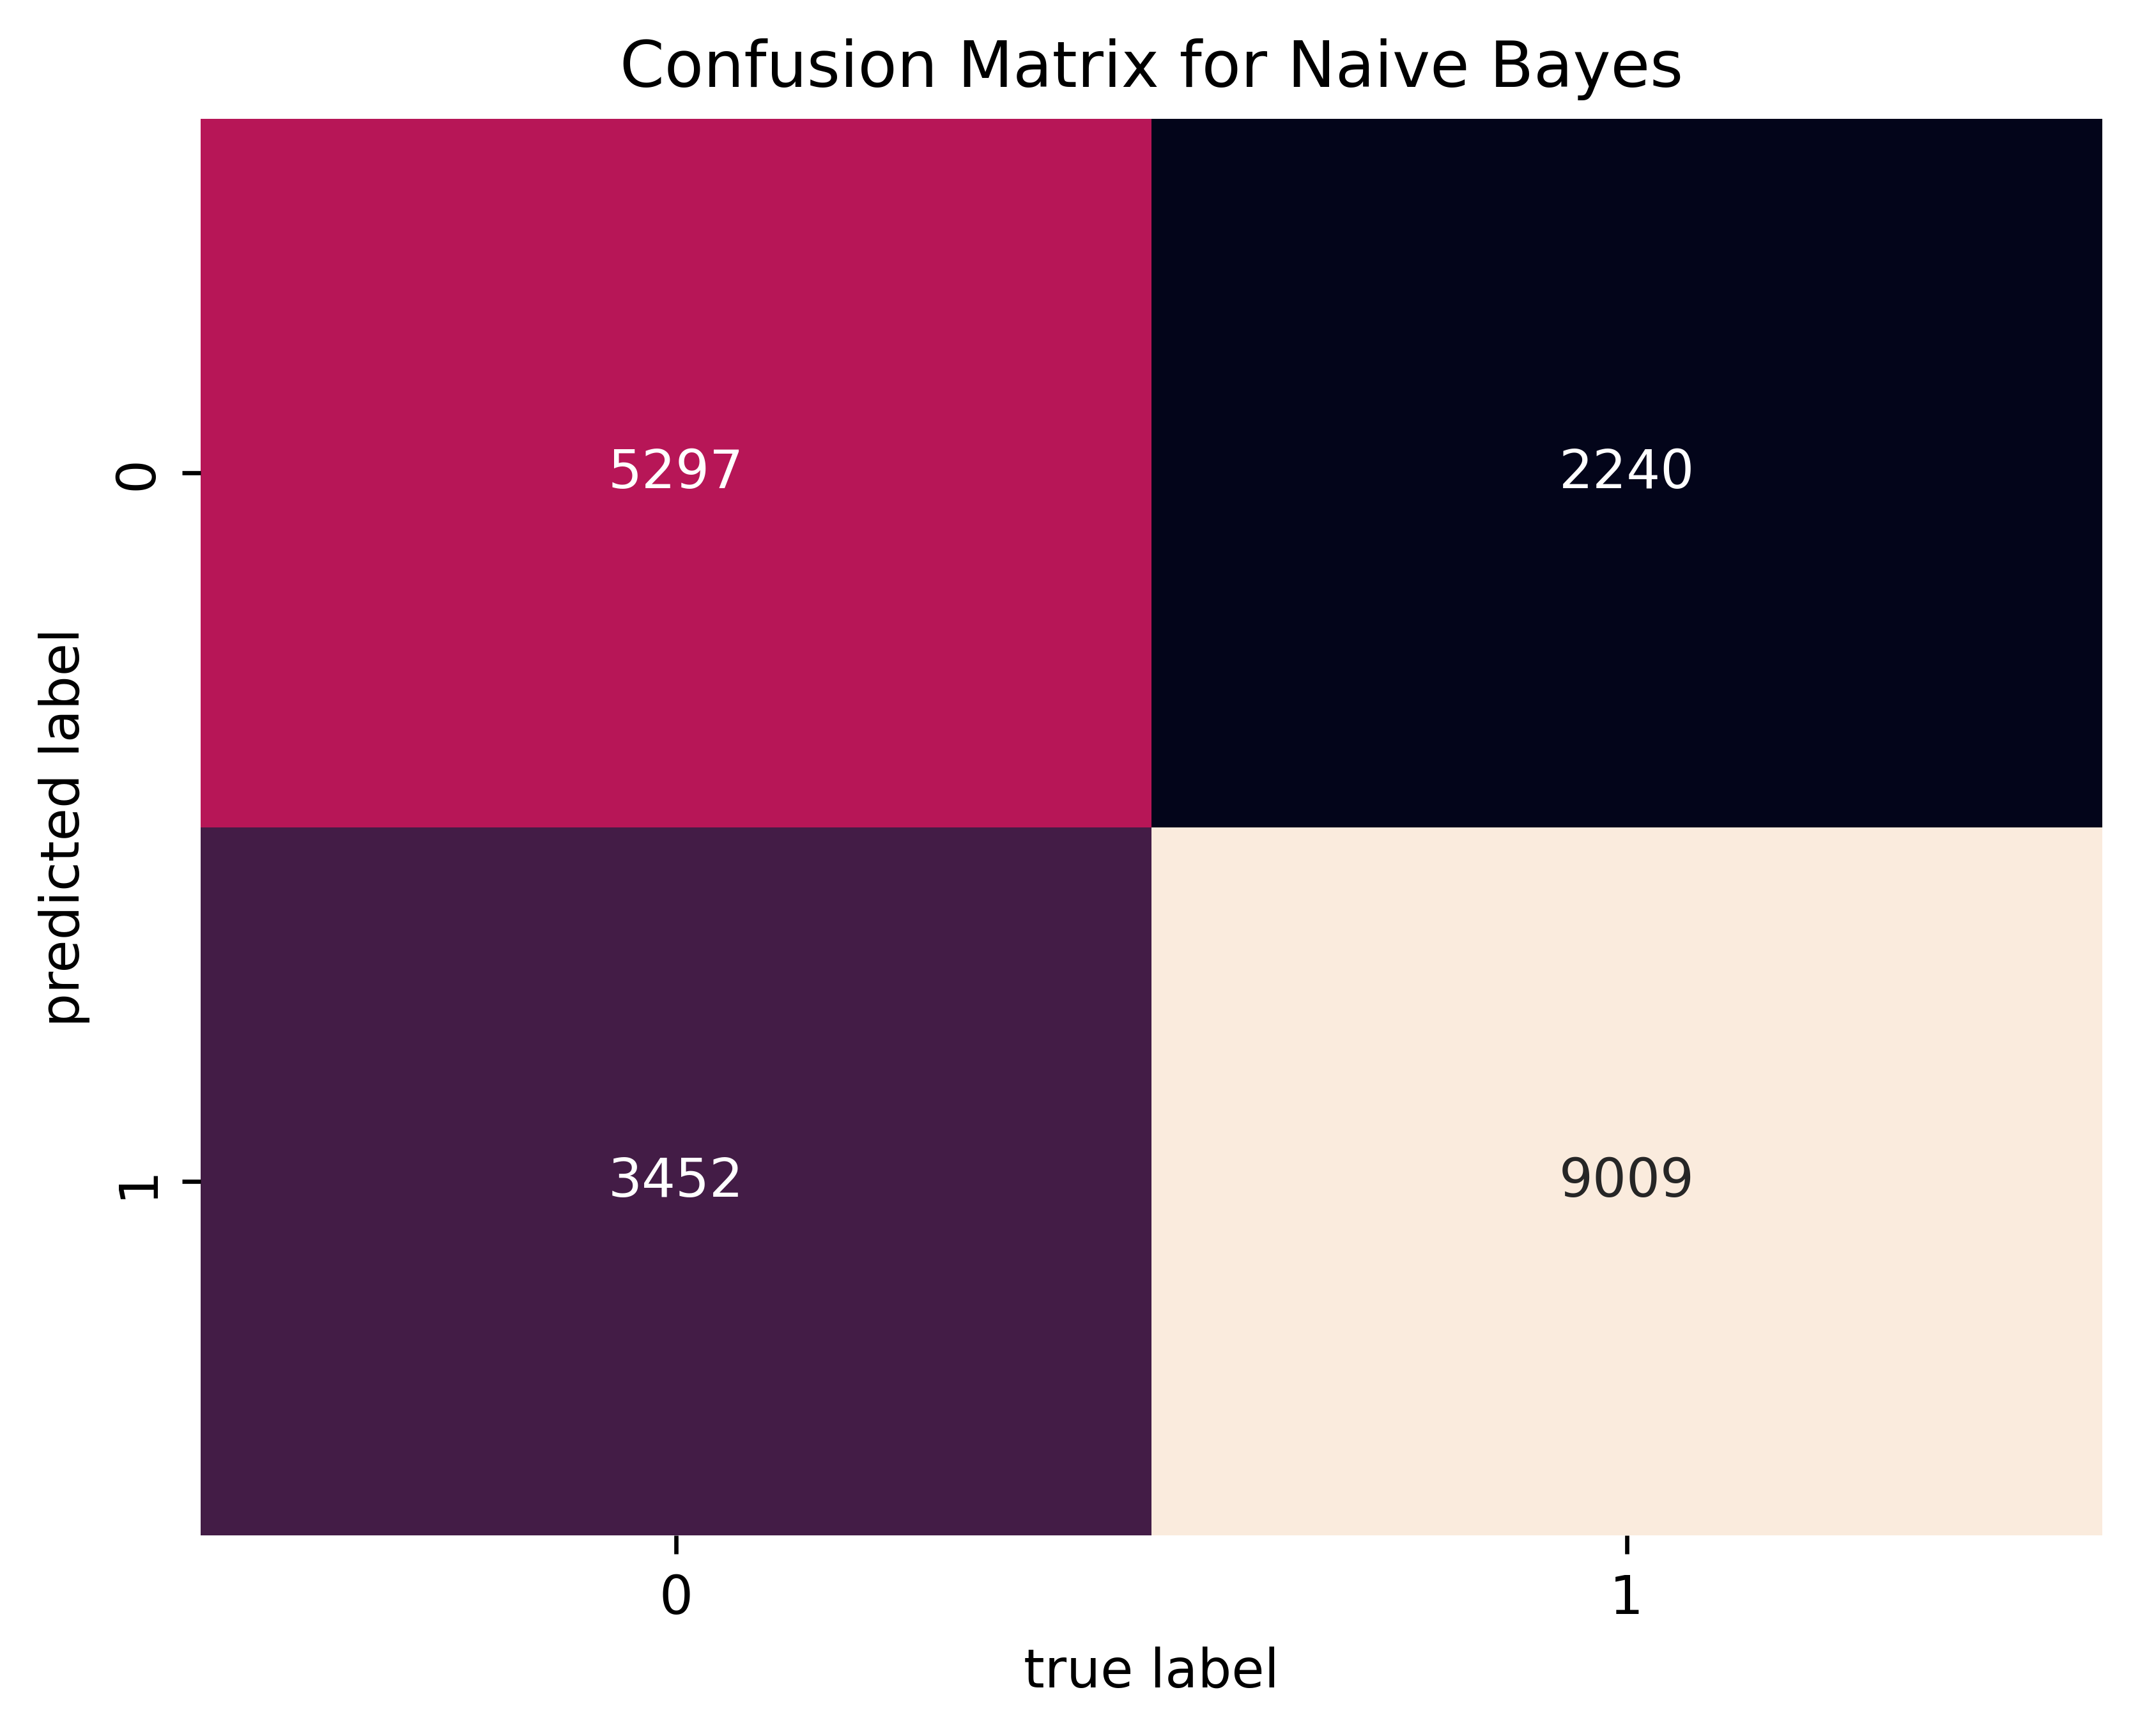

In [166]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()


In [167]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive*100)

Accuracy with Naive-bayes:  71.53715371537153


In [ ]:
from sklearn import classification_report
report = classification_report(y_test,predicted_naive)
print(report)

In [170]:
# Function for testing a new text input
def test_analizer(input_text):


    # Preprocess the input text
    input_text = remove_pattern(input_text, "@[\w]*")
    input_text = re.sub("[^a-zA-Z#]", " ", input_text)
    input_text = ' '.join([w for w in input_text.split() if len(w) > 3])
    input_text = ' '.join([stemmer.stem(i) for i in input_text.split()])

    # Convert the preprocessed text into Bag-of-Words format
    input_bow = bow_vectorizer.transform([input_text])

    # Make prediction using the trained Naive Bayes model
    prediction = model_naive.predict(input_bow)



    # # Display the result
    if prediction[0] == 0:
       x = "The input text is predicted as Negative."
    if prediction[0] == 1:
       x = "The input text is predicted as Positive."

    return x
# # Test the function with a sample input
# sample_input = "This is a positive tweet! #happy"
# result = test_analizer(sample_input)



In [180]:
sample_input = "fuck"
test_analizer(sample_input)

'The input text is predicted as Negative.'